In [252]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [253]:
mouse_count = data_complete['Mouse ID'].nunique()
print(mouse_count)

249


In [254]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mouse = data_complete.loc[data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [255]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID
duplicate_mouse = data_complete.loc[data_complete["Mouse ID"] == "g989"]

In [256]:
clean_data = data_complete[data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]

In [257]:
new_count = clean_data['Mouse ID'].nunique()
print(new_count)

248


In [258]:
# Grouping using summary statistical methods to calculate the following properties of each drug regimen: 
drug_groups = clean_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume

average_tumor = round(drug_groups['Tumor Volume (mm3)'].mean(),2)
median_tumor = round(drug_groups['Tumor Volume (mm3)'].median(),2)
variance_tumor = round(drug_groups['Tumor Volume (mm3)'].var(),2)
sd_tumor = round(drug_groups['Tumor Volume (mm3)'].std(),2)
sem_tumor = round(drug_groups['Tumor Volume (mm3)'].sem(),2)

# Assemble the resulting series into a single summary DataFrame.

tumor_volume_summary = pd.DataFrame({
    "Average of Tumor Volume":  average_tumor,
    "Median of Tumor Volume": median_tumor,
    "Variance of Tumor Volume": variance_tumor,
    "Standard Deviaton of Tumor Volume": sd_tumor,
    "SEM of Tumor Volume": sem_tumor
})
tumor_volume_summary

,Average of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviaton of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


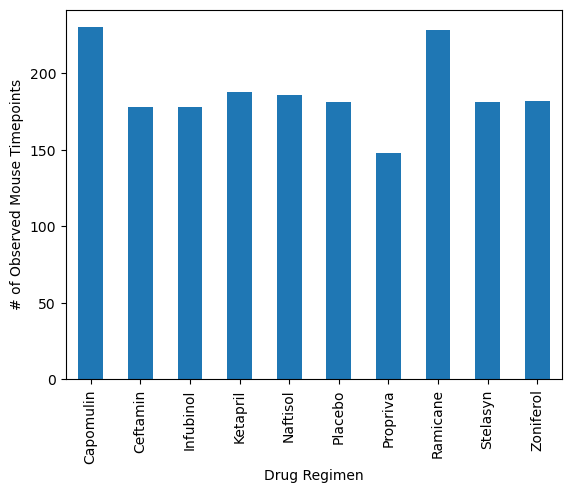

In [259]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group the data by 'Drug Regimen' and count the number of rows
counts = clean_data.groupby('Drug Regimen').size()

# Create a bar plot
counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()

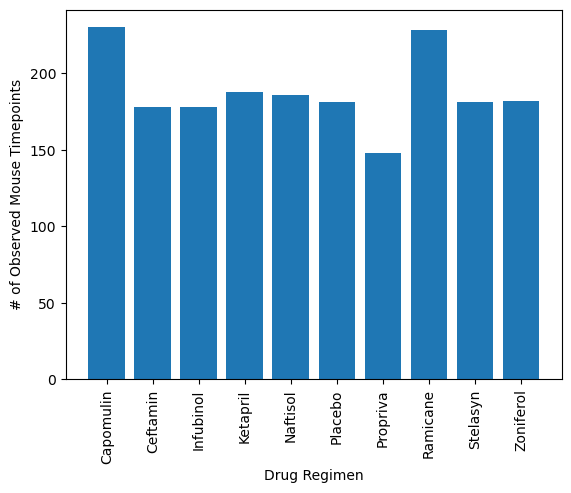

In [260]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group the data by 'Drug Regimen' and count the number of rows
counts = clean_data.groupby('Drug Regimen').size()

# Get the drug regimens and counts as separate lists
regimens = counts.index.tolist()
count_values = counts.values.tolist()

# Create a bar plot
plt.bar(regimens, count_values)

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

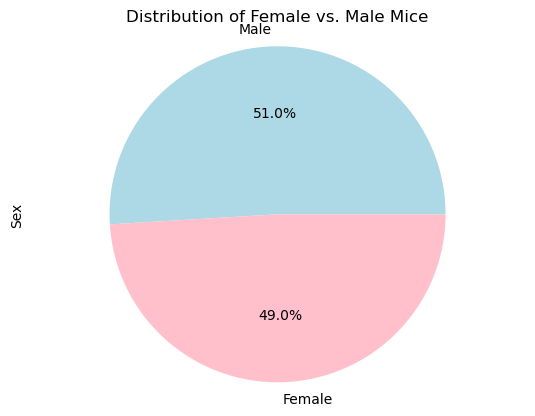

In [261]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by 'Sex' and count the number of mice
counts = clean_data['Sex'].value_counts()

# Create a pie plot
counts.plot(kind='pie', autopct='%1.1f%%',colors=['lightblue', 'pink'])

# Equal aspect ratio ensures a circular pie plot
plt.axis('equal')

# Title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()

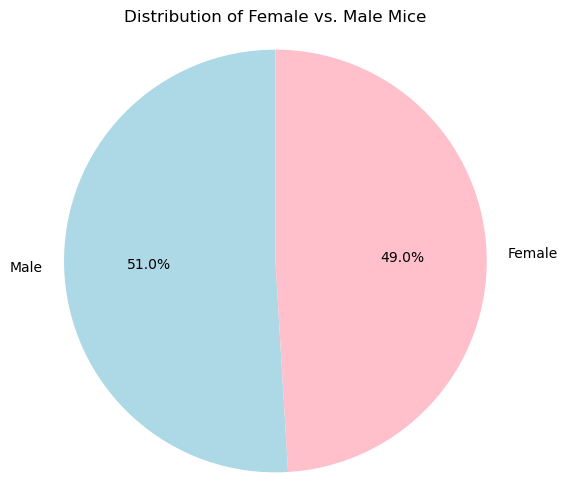

In [262]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get the count of each gender in the dataset
gender_counts = clean_data['Sex'].value_counts()

# Create the pie plot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Distribution of Female vs. Male Mice')

# Equal aspect ratio ensures a circular pie plot
plt.axis('equal')

# Show the plot
plt.show()

In [263]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Group by mouse ID and get the maximum timepoint for each mouse
max_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max()
max_timepoints

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [264]:
# Merge the maximum timepoints DataFrame with the original DataFrame
merged_df = pd.merge(max_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the merged DataFrame for the four specific treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]

# Display the DataFrame with the final tumor volumes
final_tumor_volumes.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [265]:
import numpy as np 

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data
tumor_vol_data = []

# Iterate through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add the tumor volume data to the list
    tumor_vol_data.append(tumor_volumes)
    
# Calculate the IQR and determine outliers
for i, treatment in enumerate(treatments):
    # Calculate the IQR
    quartiles = np.percentile(tumor_vol_data[i], [25, 75])
    lower_quartile = quartiles[0]
    upper_quartile = quartiles[1]
    iqr = upper_quartile - lower_quartile
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Determine outliers
    outliers = tumor_vol_data[i][(tumor_vol_data[i] < lower_bound) | (tumor_vol_data[i] > upper_bound)]
    
    # Print the results
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


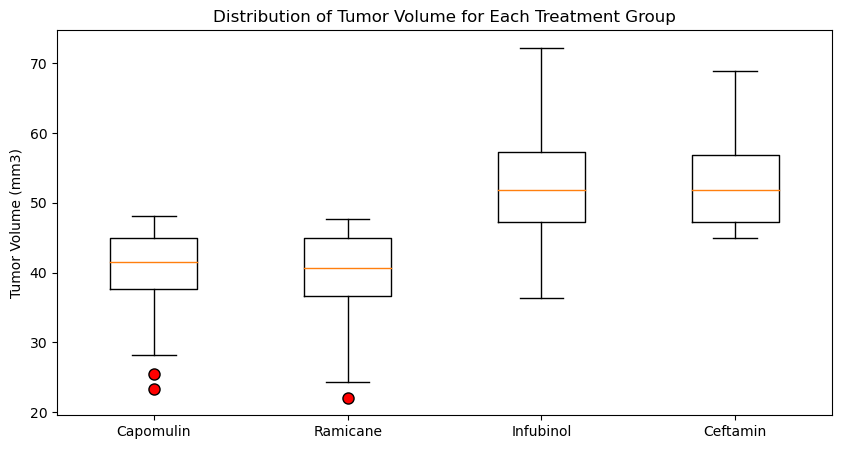

In [266]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create the box plot
plt.figure(figsize=(10,5))
ax = plt.subplot()

# List of treatment group to include in the box plot
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Use a list comprehension to extract tumor volume data for each treatment group and create the box plots
boxplot_data = [clean_data[clean_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] for regimen in treatments]
red_circle = dict(markerfacecolor='r', marker='o', markersize=8, linestyle='none')
ax.boxplot(boxplot_data, labels=treatments, flierprops=red_circle)

ax.set_title("Distribution of Tumor Volume for Each Treatment Group")
ax.set_ylabel("Tumor Volume (mm3)")
red_circle = dict(markerfacecolor='r', marker="o")

# Show the plot
plt.show()

In [267]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for the specific mouse ID and Capomulin treatment
# list of mice treated with Capomulin 
cap_mice = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
cap_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

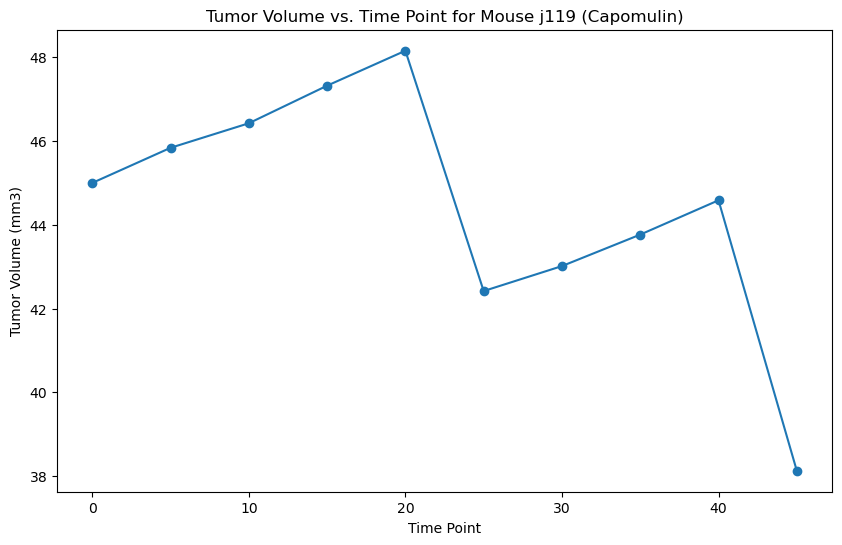

In [268]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

selected_mouse_id = 'j119'

selected_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == selected_mouse_id)]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(selected_data['Timepoint'], selected_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin)')

# Show the plot
plt.show()

In [269]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Filter the data to include only the 'Capomulin' regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the original data to get mouse weight
merged_data = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID')
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Tumor Volume (mm3)_y
0,s185,Capomulin,Female,3,17,0,45.000000,0,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,34.559143


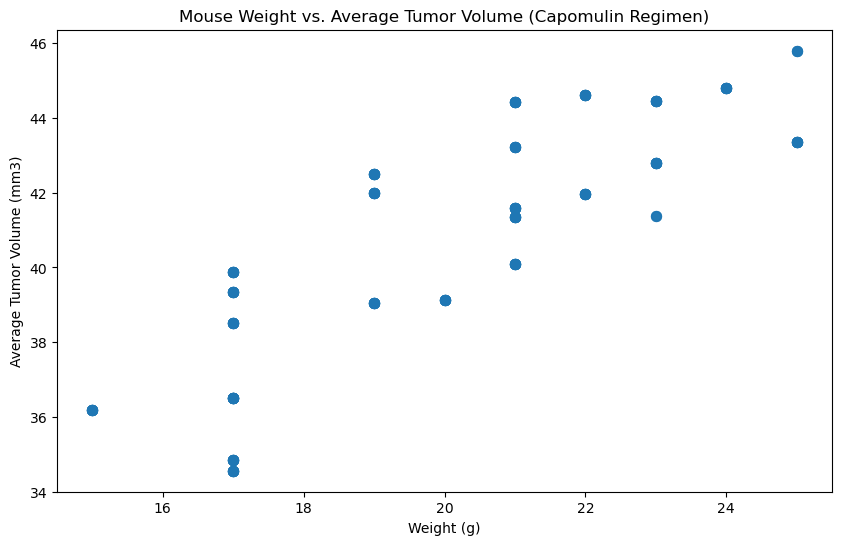

In [270]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_y'], marker='o', s=50, alpha=0.7)

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Show the plot
plt.show()

In [271]:
# Filter the data to include only the 'Capomulin' regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the original data to get mouse weight
merged_data = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID', suffixes=('_original', '_average'))
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_original,Metastatic Sites,Tumor Volume (mm3)_average
0,s185,Capomulin,Female,3,17,0,45.000000,0,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,34.559143


The correlation between mouse weight and the average tumor volume is 0.83


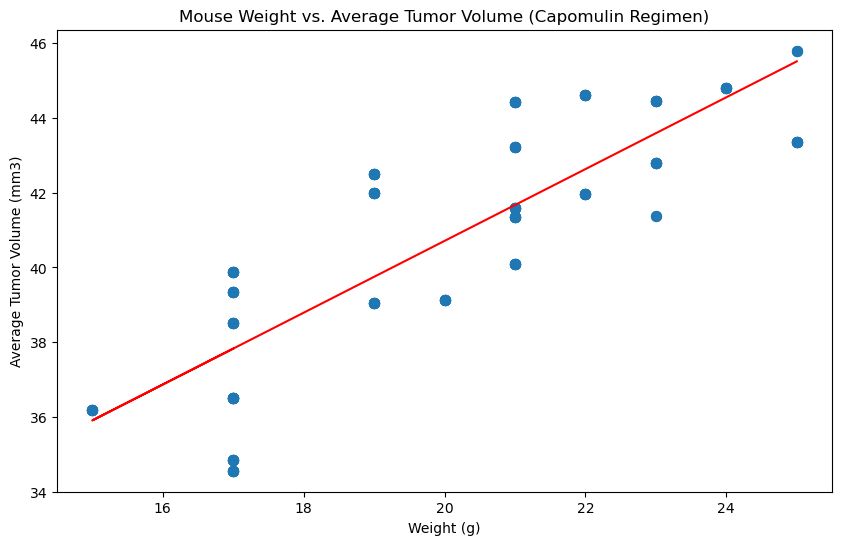

In [272]:
# Calculate the correlation coefficient and a linear regression model 
#for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'])
print("The correlation between mouse weight and the average tumor volume is", round(correlation_coefficient, 2))
# Perform linear regression
slope, intercept, _, _, _ = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'])

# Create the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'], marker='o', s=50, alpha=0.7)
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Show the plot
plt.show()